# Benchmarking Sophia

This benchmark compares the performances of the basic [sophia](https://github.com/pchampin/sophia_rs) graphs
with the Sophia HDT adapter.

It was executed on an Intel® Core™ i9-12900K CPU with 8 p + 8 e cores, 24 threads and 32 GiB of RAM.
See [benchmark_results.ipynb](./benchmark_results.ipynb) for more results on the tested configurations.

In [7]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from plot_utils import *

## The `query` test

This test consists in loading an N-Triple file in memory,
and querying all the triples with a given subject and object.

It has been tested with the following tools:

* `jena`: [Apache Jena](http://jena.apache.org/) 4.7.0 compiled and executed with OpenJDK 19.0.1
* `n3js`: [N3.js](https://github.com/rdfjs/N3.js#readme) 1.6.3 executed with Node.js v16.18.0
* `librdf`: [librdf](http://librdf.org/) 1.0.17 compiled with clang 14.0.6
* `python`: [RDFlib](http://rdflib.readthedocs.org/) 6.2.0 executed with Python 3.10.8
* `sophia`: [sophia](https://github.com/pchampin/sophia_rs) v0.7.2 compiled with rustc 1.67.0-nightly
  (using [FastGraph](https://docs.rs/sophia/latest/sophia/graph/inmem/type.FastGraph.html))*
* `sophia_lg`: [sophia](https://github.com/pchampin/sophia_rs) v0.7.2 compiled with rustc 1.67.0-nightly
  (using [LightGraph](https://docs.rs/sophia/latest/sophia/graph/inmem/type.LightGraph.html))*
* `sophia_hdt`: [hdt](https://github.com/konradhoeffner/hdt) 0.0.7 with sophia v0.7.2 compiled with rustc 1.67.0-nightly


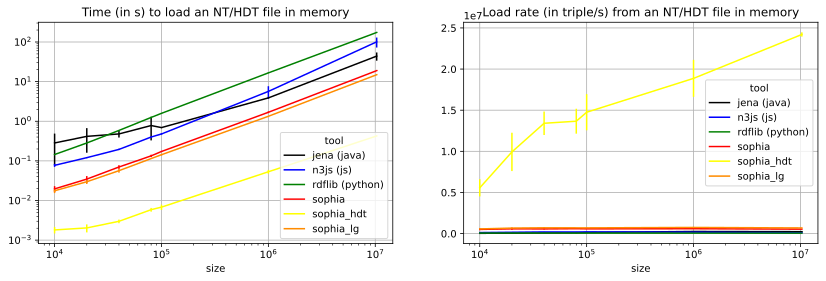

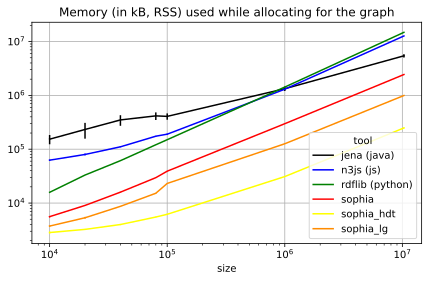

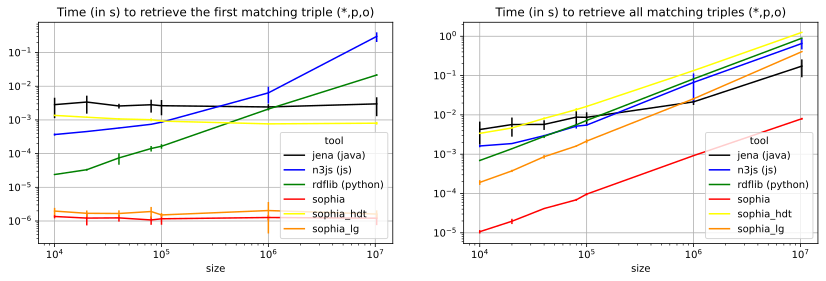

In [10]:
plot_query_stats(load_data("query", "sophia", "sophia_lg", "sophia_hdt", "jena", "python", "n3js"), group=True)